### **Table of Contents**
* [Keep this file in your project](#keep-this-file-in-your-project)

This project uses temperature data from the Louisville Weather Forecast office, ozone level data from stations in Jefferson County, and humidity and windchill data(to calculate average windchill and heat index) from the Louisville International Airport. These will provide estimates of extreme weather and unsafe air conditions for each day in 2024.

## (Will remove following Issues section when project is complete- using to stay organized)
First Sprint Issues(10/27 deadline):
- Find Data and Note Source     -done
- Read in Data                  -done
- Convert Data to a Usable Format  -done
- Build Ways to Handle Errors   -done
- Get General Info from Data    -done

Second Sprint Issues (11/19 deadline):
- Deal with Nulls     -done
- Clean Up Code       -done
- Feature Engineering -done
- Clean Your Dataset  -done

Third Spring Issues (12/10 deadline):

- Style Sheet/Annotations

Once you have the data you want in the correct plot:

Look at the plotting notebook
Make a copy of it then study the style sheet and annotations
Apply them to your plots using the style sheet provided and functions
This is so all the projects have a consistent look

- Plot Findings        -done
- Add to your README   -done

- Clean Up Notebooks

Remove not needed or unused things like df.shape df.info, etc.
Things like df.head() should be very sparse in the notebooks as well
Use markdown above the codeblock to explain the code. Things like if you removed nulls, why this code drops columns, what the code is doing, etc.



## Find Data and Note Source
Data set #1: 2024 Louisville Daily Max and Min Temperatures

Data: 4147807.csv

Source: https://www.ncdc.noaa.gov/cdo-web/search

Data set #2: 2024 Louisville Daily Ozone Readings

Data: ad_viz_plotval_data.csv

Source: https://www.epa.gov/outdoor-air-quality-data/download-daily-data

Dataset #3: Louisville International Airport Climatological Data- contains wind speed and humidity

Data: temp_wind_humidity

Source:  https://www.ncei.noaa.gov/access/search/data-search/local-climatological-data-v2?pageNum=1&dataTypes=DailyAverageRelativeHumidity&dataTypes=DailyMaximumDryBulbTemperature&dataTypes=DailyMinimumDryBulbTemperature&dataTypes=DailyPeakWindSpeed&dataTypes=DailySustainedWindSpeed&startDate=2024-01-01T00:00:00&endDate=2024-12-31T23:59:59&bbox=38.469,-85.965,38.043,-85.539

## Reading in Data

In [152]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import matplotlib.image as mpimg
import matplotlib.ticker as mticker
from pypalettes import load_cmap
from highlight_text import ax_text
from drawarrow import ax_arrow
from cycler import cycler

# sets the float format for pandas to display numbers without decimal places
pd.set_option('display.float_format', '{:,.0f}'.format)

Reading in temperature data set:

In [153]:
temp_df = pd.read_csv("data/4147807.csv")


Reading in ozone data set:

In [154]:
ozone_df = pd.read_csv("data/ad_viz_plotval_data.csv")

Reading in Temp/Wind/Humidity data:

In [155]:
temp_wind_hum_df = pd.read_csv("data/temp_wind_humidity.csv", low_memory=False)

## Coverting Data to a Usable Format, and Building Ways to Handle Errors:

### Temperature data:

Checking for null values:

In [156]:
temp_df.isnull().sum()


STATION    0
NAME       0
DATE       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
TOBS       0
dtype: int64

In [157]:
temp_df.isnull().values.any()

np.False_

No nulls in temperature data.

Converting date from object to datetime:

In [158]:
temp_df['DATE'] = pd.to_datetime(temp_df['DATE'])


Renaming columns, and removing unneeded columns:

In [159]:
temp_df.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'TOBS'],
      dtype='object')

In [160]:
temp_df = temp_df.rename(columns = {'TMAX': 'Max_Temp', 'TMIN': 'Min_Temp', 'DATE': 'Date'})


In [161]:
temp_df.drop(['NAME', 'STATION', 'PRCP', 'SNOW', 'SNWD', 'TOBS'], axis=1, inplace=True)

Checking for duplicated rows(even though it looks like one row for each day with 366 rows):

In [162]:
temp_df[temp_df['Date'].duplicated()]

,Date,Max_Temp,Min_Temp


### Ozone data:

Checking for null values:

In [163]:
ozone_df.isnull().sum()

Date                                      0
Source                                    0
Site ID                                   0
POC                                       0
Daily Max 8-hour Ozone Concentration      0
Units                                     0
Daily AQI Value                           0
Local Site Name                         341
Daily Obs Count                           0
Percent Complete                          0
AQS Parameter Code                        0
AQS Parameter Description                 0
Method Code                               0
CBSA Code                                 0
CBSA Name                                 0
State FIPS Code                           0
State                                     0
County FIPS Code                          0
County                                    0
Site Latitude                             0
Site Longitude                            0
dtype: int64

In [164]:
ozone_df[ozone_df['Local Site Name'].isnull()]

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
344,01/01/2024,AQS,180430008,1,0,ppm,16,NaN,17,100,...,Ozone,47,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
345,01/03/2024,AQS,180430008,1,0,ppm,22,NaN,17,100,...,Ozone,47,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
346,01/04/2024,AQS,180430008,1,0,ppm,20,NaN,17,100,...,Ozone,47,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
347,01/05/2024,AQS,180430008,1,0,ppm,15,NaN,17,100,...,Ozone,47,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
348,01/06/2024,AQS,180430008,1,0,ppm,18,NaN,17,100,...,Ozone,47,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,12/26/2024,AQS,180430008,1,0,ppm,20,NaN,17,100,...,Ozone,87,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
681,12/27/2024,AQS,180430008,1,0,ppm,23,NaN,17,100,...,Ozone,87,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
682,12/28/2024,AQS,180430008,1,0,ppm,17,NaN,17,100,...,Ozone,87,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86
683,12/29/2024,AQS,180430008,1,0,ppm,38,NaN,17,100,...,Ozone,87,31140,"Louisville/Jefferson County, KY-IN",18,Indiana,43,Floyd,38,-86


Filling in the nulls with 'unknown', as they all come from the same latitude and longitude.  Also, this site is in Floyd County, not Jeffersone, and I will be removing the data from sites that are not in Jefferson County, as I am focusing on Lousiville Metro data.

In [165]:
ozone_df['Local Site Name'] = ozone_df['Local Site Name'].fillna('Unknown')

In [166]:
ozone_df.isnull().sum()

Date                                    0
Source                                  0
Site ID                                 0
POC                                     0
Daily Max 8-hour Ozone Concentration    0
Units                                   0
Daily AQI Value                         0
Local Site Name                         0
Daily Obs Count                         0
Percent Complete                        0
AQS Parameter Code                      0
AQS Parameter Description               0
Method Code                             0
CBSA Code                               0
CBSA Name                               0
State FIPS Code                         0
State                                   0
County FIPS Code                        0
County                                  0
Site Latitude                           0
Site Longitude                          0
dtype: int64

Converting 'Date' column from object to datetime:

In [167]:
ozone_df['Date'] = pd.to_datetime(ozone_df['Date'])

Removing columns and renaming columns:

In [168]:
ozone_df.columns = ozone_df.columns.str.replace(' ', '_')

In [169]:
ozone_df.rename(columns = {'Daily_Max_8-hour_Ozone_Concentration': 'Max_Concentration', 'Daily_AQI_Value': 'AQI_Value', 'AQS_Parameter_Description': 'Substance_Measured'}, inplace=True)

In [170]:
ozone_df.drop(['Daily_Obs_Count', 'Units', 'Source', 'POC', 'Method_Code', 'CBSA_Code', 'CBSA_Name', 'State_FIPS_Code', 'State', 'County_FIPS_Code', 'AQS_Parameter_Code', 'Percent_Complete', 'Site_ID', 'Site_Latitude', 'Site_Longitude'], axis=1, inplace=True)

Not all sites are in Lousiville Metro- removing counties that are not Jefferson:

In [171]:
ozone_df['County'].value_counts()

County
Jefferson    1077
Clark         344
Floyd         341
Bullitt       241
Oldham        240
Name: count, dtype: int64

In [172]:
ozone_df = ozone_df[ozone_df['County'] == 'Jefferson']

Removing more uneeded columns:

In [173]:
ozone_df.drop(['Max_Concentration', 'Local_Site_Name', 'County'], axis=1, inplace=True)

Checking datatypes:

In [174]:
ozone_df.dtypes

Date                  datetime64[ns]
AQI_Value                      int64
Substance_Measured            object
dtype: object

Checking for duplicates:

In [175]:
ozone_df[ozone_df.duplicated(subset=['Date'])]

,Date,AQI_Value,Substance_Measured
1217,2024-03-01,23,Ozone
1218,2024-03-02,22,Ozone
1219,2024-03-03,34,Ozone
1220,2024-03-04,33,Ozone
1221,2024-03-05,28,Ozone
...,...,...,...
1998,2024-10-26,36,Ozone
1999,2024-10-27,37,Ozone
2000,2024-10-28,33,Ozone
2001,2024-10-29,43,Ozone


There are readings from multiple stations in Jefferson County for each day.

Aggregating ozone data to keep the max ozone reading per day:

In [176]:
ozone_agg_df = ozone_df.groupby(ozone_df['Date']).max().reset_index()

### Temp/Wind/Humidity Data:

Removing uneeded columns:

In [177]:
temp_wind_hum_df.drop(['BackupDirection', 'BackupDistance', 'BackupDistanceUnit',
       'BackupElements', 'BackupElevation', 'BackupEquipment',
       'BackupLatitude', 'BackupLongitude', 'BackupName',
       'WindEquipmentChangeDate','LATITUDE', 'LONGITUDE', 'ELEVATION','REPORT_TYPE','ShortDurationPrecipitationValue020',
       'ShortDurationPrecipitationValue030',
       'ShortDurationPrecipitationValue045',
       'ShortDurationPrecipitationValue060',
       'ShortDurationPrecipitationValue080',
       'ShortDurationPrecipitationValue100',
       'ShortDurationPrecipitationValue120',
       'ShortDurationPrecipitationValue150',
       'ShortDurationPrecipitationValue180', 'REM','HourlyPrecipitation',
       'HourlyPresentWeatherType', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'DailyWeather', 'MonthlyAverageRH',
       'MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip',
       'MonthlyDaysWithGT32Temp', 'MonthlyDaysWithGT90Temp',
       'MonthlyDaysWithLT0Temp', 'MonthlyDaysWithLT32Temp',
       'MonthlyDepartureFromNormalAverageTemperature',
       'MonthlyDepartureFromNormalCoolingDegreeDays',
       'MonthlyDepartureFromNormalHeatingDegreeDays',
       'MonthlyDepartureFromNormalMaximumTemperature',
       'MonthlyDepartureFromNormalMinimumTemperature',
       'MonthlyDepartureFromNormalPrecipitation', 'MonthlyDewpointTemperature',
       'MonthlyGreatestPrecip', 'MonthlyGreatestPrecipDate', 'DailyPrecipitation',
       'DailySnowDepth', 'DailySnowfall', 'DailySustainedWindDirection', 'DailyPeakWindDirection', 'DailyCoolingDegreeDays',
       'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays', 'DailyAverageSeaLevelPressure',
       'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature', 'Sunrise', 'Sunset',
       'DailyAverageDewPointTemperature', 'HourlySkyConditions',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyPressureChange', 'HourlyPressureTendency', 'MonthlyGreatestSnowDepth',
       'MonthlyGreatestSnowDepthDate', 'MonthlyGreatestSnowfall',
       'MonthlyGreatestSnowfallDate', 'MonthlyMaxSeaLevelPressureValue',
       'MonthlyMaxSeaLevelPressureValueDate',
       'MonthlyMaxSeaLevelPressureValueTime', 'MonthlyMaximumTemperature',
       'MonthlyMeanTemperature', 'MonthlyMinSeaLevelPressureValue',
       'MonthlyMinSeaLevelPressureValueDate',
       'MonthlyMinSeaLevelPressureValueTime', 'MonthlyMinimumTemperature',
       'MonthlySeaLevelPressure', 'MonthlyStationPressure',
       'MonthlyTotalLiquidPrecipitation', 'MonthlyTotalSnowfall',
       'MonthlyWetBulb', 'MonthlyAverageWindSpeed',
       'CoolingDegreeDaysSeasonToDate', 'MonthlyCoolingDegreeDays',
       'MonthlyNumberDaysWithSnowfall', 'HeatingDegreeDaysSeasonToDate',
       'MonthlyHeatingDegreeDays', 'MonthlyNumberDaysWithThunderstorms',
       'MonthlyNumberDaysWithHeavyFog', 'NormalsCoolingDegreeDay',
       'NormalsHeatingDegreeDay', 'ShortDurationEndDate005',
       'ShortDurationEndDate010', 'ShortDurationEndDate015',
       'ShortDurationEndDate020', 'ShortDurationEndDate030',
       'ShortDurationEndDate045', 'ShortDurationEndDate060',
       'ShortDurationEndDate080', 'ShortDurationEndDate100',
       'ShortDurationEndDate120', 'ShortDurationEndDate150',
       'ShortDurationEndDate180', 'ShortDurationPrecipitationValue005',
       'ShortDurationPrecipitationValue010',
       'ShortDurationPrecipitationValue015', 'HourlyDryBulbTemperature',
       'HourlyRelativeHumidity', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'NAME', 'DailyAverageWindSpeed', 'DailyPeakWindSpeed', 'SOURCE', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature','DailyAverageDryBulbTemperature', 'STATION' ], axis=1, inplace=True)

This data contains hourly data and daily averages, so removing rows that do not have daily average values.(Already removed the hourly reading columns.)

In [178]:
temp_wind_hum_df = temp_wind_hum_df.dropna(subset=['DailyAverageRelativeHumidity'])

In [179]:
temp_wind_hum_df.isnull().sum()

DATE                            0
DailyAverageRelativeHumidity    0
DailySustainedWindSpeed         0
dtype: int64

Checking data types:

In [180]:
temp_wind_hum_df.dtypes

DATE                             object
DailyAverageRelativeHumidity    float64
DailySustainedWindSpeed         float64
dtype: object

Converting date to datetime, and removing hours, minutes, and seconds, so it matches the other dataframes with only year, month, and day:

In [181]:
temp_wind_hum_df['DATE'] = pd.to_datetime(temp_wind_hum_df['DATE'])

In [182]:
temp_wind_hum_df['DATE'] = temp_wind_hum_df['DATE'].dt.date

In [183]:
temp_wind_hum_df['DATE'] = pd.to_datetime(temp_wind_hum_df['DATE'])

In [184]:
temp_wind_hum_df.dtypes

DATE                            datetime64[ns]
DailyAverageRelativeHumidity           float64
DailySustainedWindSpeed                float64
dtype: object

Renaming columns:

In [185]:
temp_wind_hum_df = temp_wind_hum_df.rename(columns = {'DATE': 'Date', 'DailyAverageRelativeHumidity': 'Average_Humidity',
       'DailySustainedWindSpeed': 'Sust_Wind_Speed'})

Checking for duplicates:

In [186]:
temp_wind_hum_df[temp_wind_hum_df['Date'].duplicated()]

,Date,Average_Humidity,Sust_Wind_Speed


## Issue: Get General Info from Data:

(I asked chatgbt "what would be considered getting general info from data?" and am using that as a template here)

Basic structure:

In [187]:
temp_df.shape

(366, 3)

In [188]:
ozone_agg_df.shape

(364, 3)

In [189]:
temp_wind_hum_df.shape

(361, 3)

In [190]:
temp_df.columns

Index(['Date', 'Max_Temp', 'Min_Temp'], dtype='object')

In [191]:
ozone_agg_df.columns

Index(['Date', 'AQI_Value', 'Substance_Measured'], dtype='object')

In [192]:
temp_wind_hum_df.columns

Index(['Date', 'Average_Humidity', 'Sust_Wind_Speed'], dtype='object')

Data types:

In [193]:
temp_df.dtypes

Date        datetime64[ns]
Max_Temp             int64
Min_Temp             int64
dtype: object

In [194]:
ozone_agg_df.dtypes

Date                  datetime64[ns]
AQI_Value                      int64
Substance_Measured            object
dtype: object

In [195]:
temp_wind_hum_df.dtypes

Date                datetime64[ns]
Average_Humidity           float64
Sust_Wind_Speed            float64
dtype: object

Quick stats for numeric columns:

In [196]:
temp_df.describe()

,Date,Max_Temp,Min_Temp
count,366,366,366
mean,2024-07-01 12:00:00.000000256,69,50
min,2024-01-01 00:00:00,14,0
25%,2024-04-01 06:00:00,56,38
50%,2024-07-01 12:00:00,73,52
75%,2024-09-30 18:00:00,85,64
max,2024-12-31 00:00:00,99,79
std,NaN,18,17


In [197]:
ozone_agg_df.describe()

,Date,AQI_Value
count,364,364
mean,2024-06-30 13:23:04.615384320,43
min,2024-01-01 00:00:00,12
25%,2024-03-31 18:00:00,29
50%,2024-06-30 12:00:00,40
75%,2024-09-29 06:00:00,48
max,2024-12-30 00:00:00,156
std,NaN,22


In [198]:
temp_wind_hum_df.describe()

,Date,Average_Humidity,Sust_Wind_Speed
count,361,361,361
mean,2024-07-01 01:07:48.698061056,61,8
min,2024-01-01 00:00:00,33,3
25%,2024-03-31 00:00:00,52,6
50%,2024-07-03 00:00:00,59,8
75%,2024-10-01 00:00:00,69,10
max,2024-12-31 00:00:00,89,19
std,NaN,12,3


Check for duplicates:

In [199]:
temp_df[temp_df.duplicated()]

,Date,Max_Temp,Min_Temp


In [200]:
ozone_agg_df[ozone_agg_df.duplicated()]

,Date,AQI_Value,Substance_Measured


In [201]:
temp_wind_hum_df[temp_wind_hum_df.duplicated()]

,Date,Average_Humidity,Sust_Wind_Speed


Unique values in columns:

In [202]:
temp_df['Date'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2024-01-02 00:00:00', '2024-01-03 00:00:00',
 '2024-01-04 00:00:00', '2024-01-05 00:00:00', '2024-01-06 00:00:00',
 '2024-01-07 00:00:00', '2024-01-08 00:00:00', '2024-01-09 00:00:00',
 '2024-01-10 00:00:00',
 ...
 '2024-12-22 00:00:00', '2024-12-23 00:00:00', '2024-12-24 00:00:00',
 '2024-12-25 00:00:00', '2024-12-26 00:00:00', '2024-12-27 00:00:00',
 '2024-12-28 00:00:00', '2024-12-29 00:00:00', '2024-12-30 00:00:00',
 '2024-12-31 00:00:00']
Length: 366, dtype: datetime64[ns]

In [203]:
#looks like missing readings from two days of the year.  will create a rolling average for these days.
ozone_agg_df['Date'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2024-01-02 00:00:00', '2024-01-03 00:00:00',
 '2024-01-04 00:00:00', '2024-01-05 00:00:00', '2024-01-06 00:00:00',
 '2024-01-07 00:00:00', '2024-01-08 00:00:00', '2024-01-09 00:00:00',
 '2024-01-10 00:00:00',
 ...
 '2024-12-21 00:00:00', '2024-12-22 00:00:00', '2024-12-23 00:00:00',
 '2024-12-24 00:00:00', '2024-12-25 00:00:00', '2024-12-26 00:00:00',
 '2024-12-27 00:00:00', '2024-12-28 00:00:00', '2024-12-29 00:00:00',
 '2024-12-30 00:00:00']
Length: 364, dtype: datetime64[ns]

In [204]:
#looks like missing readings from 5 days of the year.  will create a rolling average for these days.
temp_wind_hum_df['Date'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2024-01-02 00:00:00', '2024-01-03 00:00:00',
 '2024-01-04 00:00:00', '2024-01-05 00:00:00', '2024-01-06 00:00:00',
 '2024-01-07 00:00:00', '2024-01-08 00:00:00', '2024-01-09 00:00:00',
 '2024-01-10 00:00:00',
 ...
 '2024-12-21 00:00:00', '2024-12-22 00:00:00', '2024-12-23 00:00:00',
 '2024-12-24 00:00:00', '2024-12-25 00:00:00', '2024-12-26 00:00:00',
 '2024-12-28 00:00:00', '2024-12-29 00:00:00', '2024-12-30 00:00:00',
 '2024-12-31 00:00:00']
Length: 361, dtype: datetime64[ns]

Viewing head of dataframes:

In [205]:
temp_df.head(3)

,Date,Max_Temp,Min_Temp
0,2024-01-01,37,31
1,2024-01-02,40,29
2,2024-01-03,42,23


In [206]:
ozone_agg_df.head(3)

,Date,AQI_Value,Substance_Measured
0,2024-01-01,16,Ozone
1,2024-01-02,20,Ozone
2,2024-01-03,19,Ozone


In [207]:
temp_wind_hum_df.head(3)

,Date,Average_Humidity,Sust_Wind_Speed
0,2024-01-01,70,6
44,2024-01-02,67,6
83,2024-01-03,69,8


## Feature Engineering:

Combining temp_df and temp_wind_hum_df to be able to calculate heat index and wind chill:

In [208]:
merged_df = pd.merge(temp_df, temp_wind_hum_df, on='Date', how='left')

I am missing 5 days of data for wind and humidity.  So I will create a rolling average to fill those 5 days:

In [209]:
merged_df[merged_df['Average_Humidity'].isnull()]

,Date,Max_Temp,Min_Temp,Average_Humidity,Sust_Wind_Speed
175,2024-06-24,89,67,NaN,NaN
179,2024-06-28,92,66,NaN,NaN
180,2024-06-29,93,79,NaN,NaN
181,2024-06-30,86,69,NaN,NaN
361,2024-12-27,55,46,NaN,NaN


In [210]:
merged_df['Average_Humidity'] = merged_df['Average_Humidity'].fillna(merged_df['Average_Humidity'].rolling(window=7, min_periods=1, center=True).mean())

In [211]:
merged_df['Sust_Wind_Speed'] = merged_df['Sust_Wind_Speed'].fillna(merged_df['Sust_Wind_Speed'].rolling(window=7, min_periods=1, center=True).mean())

In [212]:
merged_df.isnull().sum()

Date                0
Max_Temp            0
Min_Temp            0
Average_Humidity    0
Sust_Wind_Speed     0
dtype: int64

Merging ozone data with merged temp, wind, and humidity data:

In [213]:
full_df = pd.merge(merged_df, ozone_agg_df, on='Date', how='left')

Missing 2 days of ozone readings, so will create rolling averages for those days:

In [214]:
full_df['AQI_Value'] = full_df['AQI_Value'].fillna(full_df['AQI_Value'].rolling(window=7, min_periods=1, center=True).mean())

In [215]:
full_df['Substance_Measured'] = full_df['Substance_Measured'].fillna('Ozone')


In [216]:
full_df.isnull().sum()

Date                  0
Max_Temp              0
Min_Temp              0
Average_Humidity      0
Sust_Wind_Speed       0
AQI_Value             0
Substance_Measured    0
dtype: int64


Creating a function to convert temp and windspeed into wind chill. 

Formula from National Weather Service.

If temp is above 50 or wind speed is below 3mph, windchill = air temperature without calculations.

In [217]:
def wind_chill(temp, wind):
    # temp in fahrenheit, wind in mph
    #temp must <= 50, wind must be >= 3
    if wind >= 3 and temp <= 50:
        wind_ch = 35.74 + 0.6215*temp - 35.75*(wind**0.16) + 0.4275*temp*(wind**0.16)
        return round(wind_ch, 1)
    else:
        return temp

#using 40 degress and 10mph wind to test function:   
wind_chill(40, 10)

33.6

Creating column 'Wind_Chill' with calculations for windchill during minimum temperature each day:

In [218]:
full_df['Wind_Chill'] = full_df.apply(lambda row: wind_chill(row['Min_Temp'], row['Sust_Wind_Speed']), axis=1)

Creating a function for calculating heat index.  Formula from National Weather Service, using temperature and humidity.

If temperature is below 80 or humidity is below 40%, the heat index = the air temperature.

This function has the formula for heat index, and returns the air temperature without calculating if temp < 80 or humidity < 40%.

In [219]:
def heat_index(temp, humidity):
    #temp in fahrenheit, relative humidity in 1-100%
    #temp must be >= 80, relative humidity >= 40%
    if temp >= 80 and humidity >= 40:
        heat_ind = (-42.379 + 2.04901523*temp + 10.14333127*humidity - 0.22475541*temp*humidity
          - 6.83783e-3*temp**2 - 5.481717e-2*humidity**2
          + 1.22874e-3*temp**2*humidity + 8.5282e-4*temp*humidity**2
          - 1.99e-6*temp**2*humidity**2)
        
        return round(heat_ind, 1)
    else:
        return temp
    
heat_index(81, 75)

85.5

Creating column 'Heat_Index' with calculations for heat index during maximum temperature each day:

In [220]:
full_df['Heat_Index'] = full_df.apply(lambda row: heat_index(row['Max_Temp'], row['Average_Humidity']), axis =1)

AQI = Air Quality Index:   0-50 good, 51-100 moderate, 101-150 unhealthy for sensitive groups, 151-200 unhealthy

Alerts issued when AQI is expected to reach 101 or more

Creating column 'Extreme_Weather' that is True if Temperature(including heat index) is 95 or higher, or Temperature(including windchill) is 35 or lower, or an ozone alert is called(with an AQI value of 100 or higher):

In [221]:
full_df['Extreme_Weather'] = (full_df['Max_Temp'] >= 95) | (full_df['Min_Temp'] <= 35) | (full_df['Wind_Chill'] <= 35) | (full_df['Heat_Index'] >= 95) | (full_df['AQI_Value'] >= 100)
full_df.head(3)

,Date,Max_Temp,Min_Temp,Average_Humidity,Sust_Wind_Speed,AQI_Value,Substance_Measured,Wind_Chill,Heat_Index,Extreme_Weather
0,2024-01-01,37,31,70,6,16,Ozone,25,37,True
1,2024-01-02,40,29,67,6,20,Ozone,22,40,True
2,2024-01-03,42,23,69,8,19,Ozone,14,42,True


Almost half of the days of the year in 2024 had extreme weather or ozone alerts:

In [222]:
full_df['Extreme_Weather'].value_counts()

Extreme_Weather
False    192
True     174
Name: count, dtype: int64

Looking at the differences of extreme weather, and noting how heat index and windchill are very important to include, as they add 85 days that the weather is considered extreme, as opposed to using just the air temperature:

In [223]:
(full_df['Max_Temp'] >= 95).sum()

np.int64(5)

In [224]:
(full_df['Heat_Index'] >= 95).sum()

np.int64(57)

In [225]:
(full_df['Min_Temp'] <= 35).sum()

np.int64(80)

In [226]:
(full_df['Wind_Chill'] <= 35).sum()

np.int64(113)

In [227]:
(full_df['AQI_Value'] >= 100).sum()

np.int64(13)

Creating a column 'Month' to aid in future plotting:

(Looking at how many days of extreme weather per month could help plan for staffing needs)

In [228]:
full_df['Month'] = full_df['Date'].dt.month_name()

Creating a column 'Temperature_Category' to create ranges of temperature.  I think this could be useful for visualizations:

First, I need to create a 'Feels_Like' column to combine windchill numbers for 50 degrees or under, heat index for 80 degrees or over, and temperature for the in between.

In [229]:
#if Max_Temp >= 80, use Heat_Index
#elif Min_Temp <= 50, use Wind_Chill
#else use Max_Temp

conditions = [
    full_df['Max_Temp'] >= 80,
    full_df['Min_Temp'] <= 50
]

choices = [
    full_df['Heat_Index'],
    full_df['Wind_Chill']
]

full_df['Feels_Like'] = np.select(conditions, choices, default=full_df['Max_Temp'])

In [230]:
bins = [float('-inf'), 35, 50, 65, 80, 95, float('inf')]
labels = ['Extreme Cold', 'Cold', 'Mild', 'Warm', 'Hot', 'Extreme Hot']
full_df['Temperature_Category'] = pd.cut(full_df['Feels_Like'], bins = bins, labels = labels)

In [231]:
full_df.head(3)

,Date,Max_Temp,Min_Temp,Average_Humidity,Sust_Wind_Speed,AQI_Value,Substance_Measured,Wind_Chill,Heat_Index,Extreme_Weather,Month,Feels_Like,Temperature_Category
0,2024-01-01,37,31,70,6,16,Ozone,25,37,True,January,25,Extreme Cold
1,2024-01-02,40,29,67,6,20,Ozone,22,40,True,January,22,Extreme Cold
2,2024-01-03,42,23,69,8,19,Ozone,14,42,True,January,14,Extreme Cold


Making a plot for days of Extreme Weather per month:

In [232]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

full_df["Month"] = pd.Categorical(full_df["Month"], categories=month_order, ordered=True)

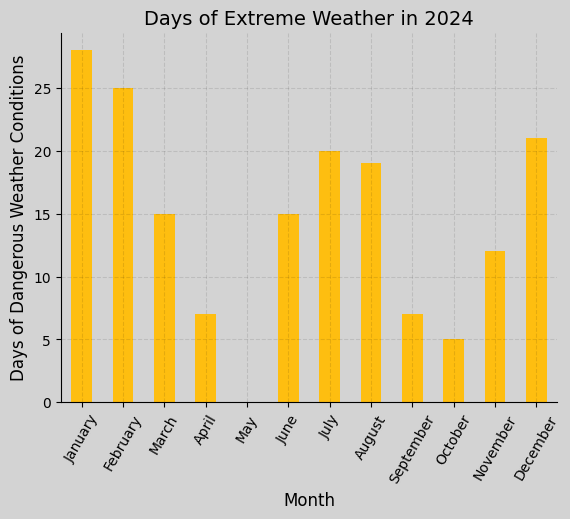

In [233]:
monthly_extreme = full_df.groupby("Month", observed=False)["Extreme_Weather"].sum()
# using observed=False so that all months are displayed, even if some have no extreme weather

monthly_extreme.plot(kind="bar")
plt.ylabel("Days of Dangerous Weather Conditions")
plt.xlabel("Month")
plt.xticks(rotation=60)
plt.title("Days of Extreme Weather in 2024")
plt.show()

Showing Temperature Categories by Month:

C:\Users\angel\AppData\Local\Temp\ipykernel_82348\4257431350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cat_by_month = full_df.groupby(["Month", "Temperature_Category"]).size().unstack(fill_value=0)


<Figure size 1400x600 with 0 Axes>

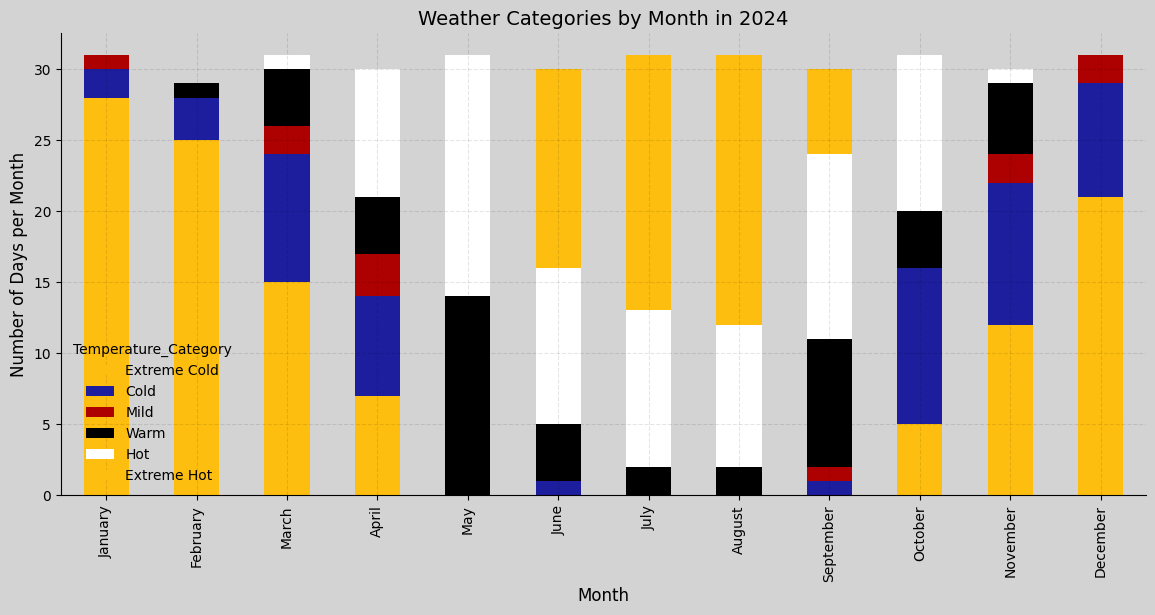

In [234]:
temp_cat_by_month = full_df.groupby(["Month", "Temperature_Category"]).size().unstack(fill_value=0)

#custom_colors = ["#111111", x6 colors]

plt.figure(figsize=(14, 6))
temp_cat_by_month.plot(kind="bar", stacked=True, figsize=(14,6))

plt.xlabel("Month")
plt.ylabel("Number of Days per Month")
plt.title("Weather Categories by Month in 2024")
plt.show()

Making a plot to show Daily Feels-Like temperature everyday in 2024, with thresholds for extreme heat and extreme cold:

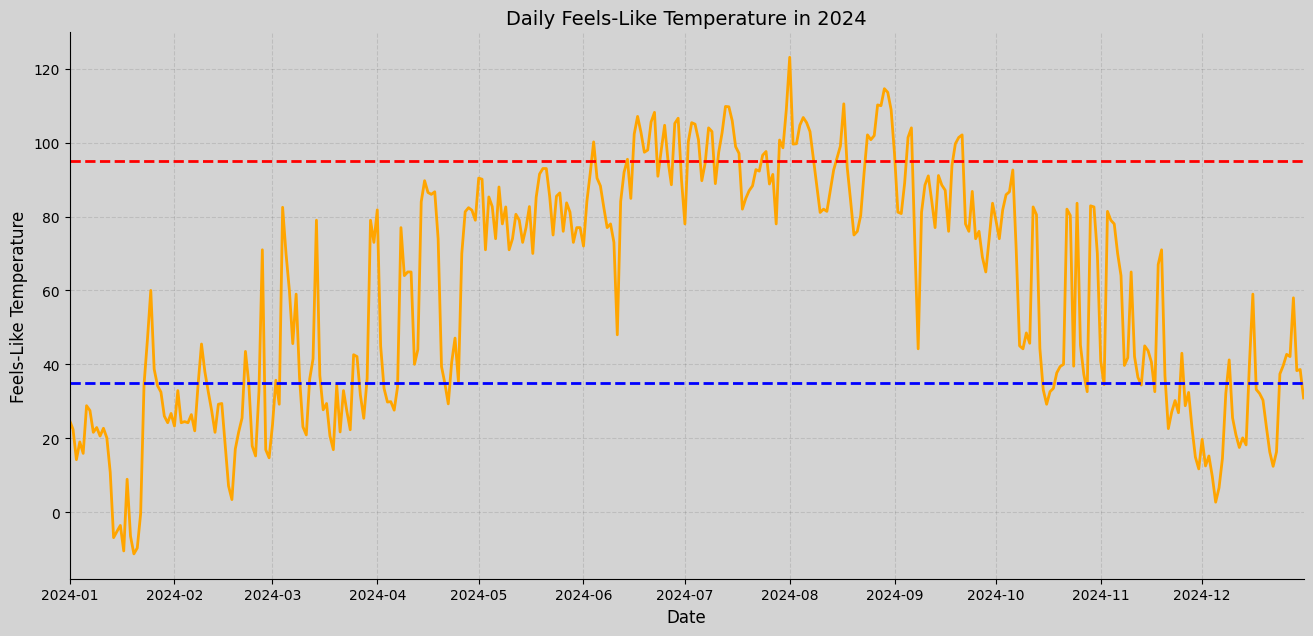

In [235]:
full_df = full_df.sort_values("Date")

plt.figure(figsize=(13, 6))
plt.plot(full_df["Date"], full_df["Feels_Like"], color="orange")
plt.margins(x=0)
plt.tight_layout()

plt.axhline(95, linestyle="--", color="red", label="Extreme Heat (95)")
plt.axhline(35, linestyle="--", color="blue", label="Extreme Cold (35)")

plt.xlabel("Date")
plt.ylabel("Feels-Like Temperature")
plt.title("Daily Feels-Like Temperature in 2024")
plt.show()


Making a plot to show Daily Ozone Levels everyday in 2024, with threshold line for unhealthy levels(over 100):

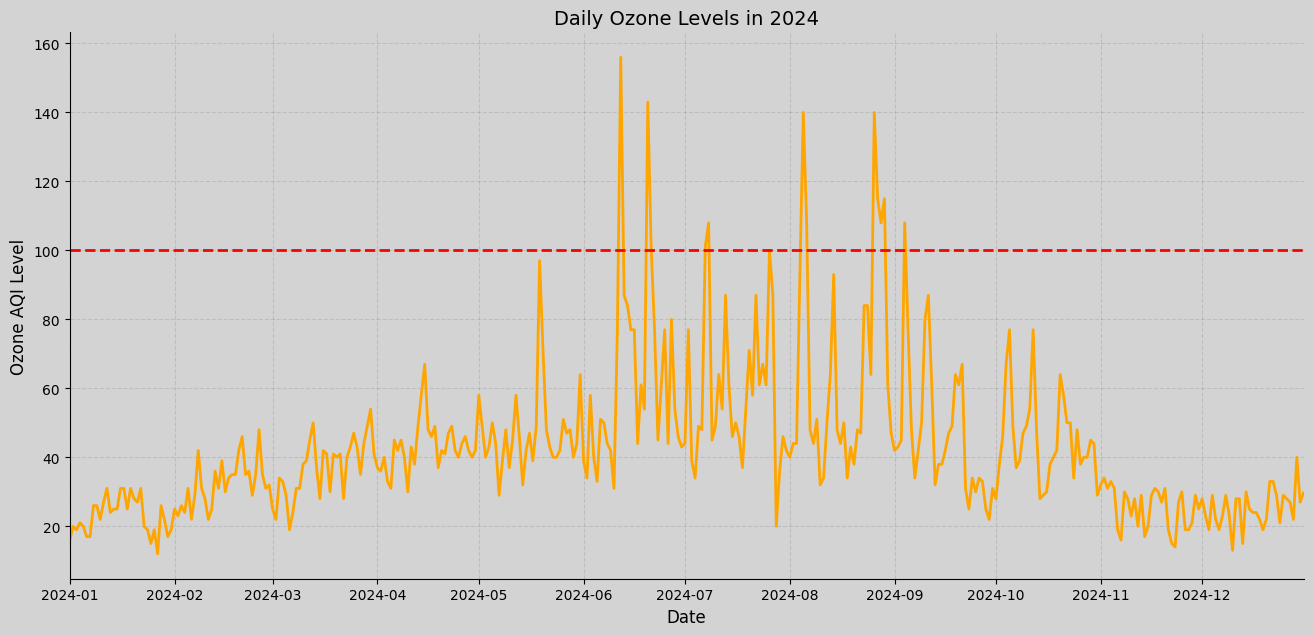

In [236]:
plt.figure(figsize=(13, 6))
plt.plot(full_df["Date"], full_df["AQI_Value"], color="orange")

plt.margins(x=0)
plt.tight_layout()
plt.axhline(100, linestyle="--", color="red")

plt.xlabel("Date")
plt.ylabel("Ozone AQI Level")
plt.title("Daily Ozone Levels in 2024")
plt.show()

Plot to show days of the year that are extreme heat, exteme cold, and unhealthy ozone:

In [237]:
#variables for counts of days in each category
extreme_cold_days = (full_df["Feels_Like"] <= 35).sum()
extreme_heat_days = (full_df["Feels_Like"] >= 95).sum()
unhealthy_ozone_days = (full_df["AQI_Value"] >= 100).sum()
total_safe_days = (full_df["Extreme_Weather"] == False).sum()
total_extreme_days = (full_df["Extreme_Weather"] == True).sum()

#create summary dictionary
summary = {
    "Extreme Cold Days": extreme_cold_days,
    "Extreme Heat Days": extreme_heat_days,
    "Unhealthy Ozone Days": unhealthy_ozone_days,
    "Total Days of Safer Weather": total_safe_days,
    "Total Days of Extreme Weather": total_extreme_days
    
}

#convert to dataframe for plotting:
summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["Count"])

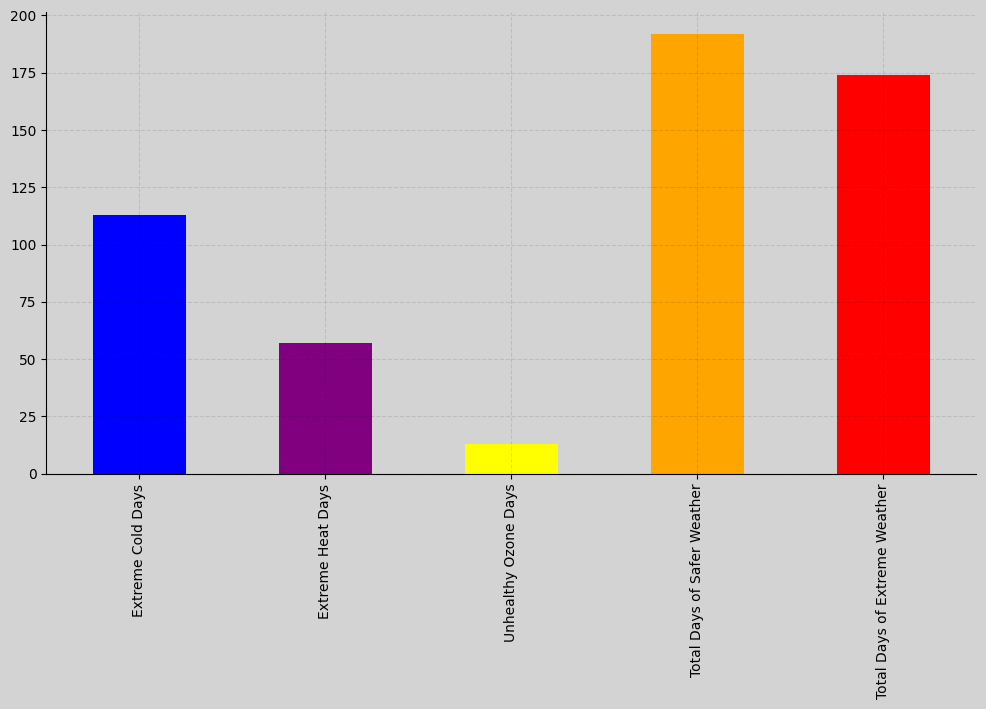

In [238]:
plt.figure(figsize=(12,6))

summary_df["Count"].plot(
    kind="bar",
    color=["blue", "purple", "yellow", "orange", "red"]
)

plt.show()

## Copying code from plotting notebook, for style and annotations to be consistent with others' visualizations:

### Style Settings:

In [239]:
# Define your custom colors
colors = ['#FEBE10', '#1D1E9E', '#AD0000', '#000000', '#FFFFFF']

plt.rcParams.update({
    # Colors
    'axes.prop_cycle': cycler('color', colors),

    # Background
    'figure.facecolor': 'lightgrey',
    'axes.facecolor': 'lightgrey',
    'savefig.facecolor': 'lightgrey',

    # Grid
    'axes.grid': True,
    'grid.color': '#000000',
    'grid.alpha': 0.1,
    'grid.linestyle': '--',

    # Lines & markers
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'lines.markeredgewidth': 0.5,

    # Axes & ticks
    'axes.edgecolor': '#000000',
    'axes.labelcolor': '#000000',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    # Legend
    'legend.frameon': False,
    'legend.fontsize': 10,
    'legend.loc': 'best',

    # Font
    'font.family': 'DejaVu Sans',
    'text.color': '#000000',

    # Savefig
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
})

### Function for formatting numbers:

In [240]:
# Create the formatter once
formatter = mticker.StrMethodFormatter("{x:,.0f}")

def apply_formatter(ax=None):
    """Automatically format numeric axes with commas, leave text/categorical axes alone."""
    if ax is None:
        ax = plt.gca()
    
    # Format x-axis only if tick labels are numbers
    x_labels = [lbl.get_text() for lbl in ax.get_xticklabels()]
    if all(_is_number(lbl) for lbl in x_labels):
        ax.xaxis.set_major_formatter(formatter)
    
    # Format y-axis only if tick labels are numbers
    y_labels = [lbl.get_text() for lbl in ax.get_yticklabels()]
    if all(_is_number(lbl) for lbl in y_labels):
        ax.yaxis.set_major_formatter(formatter)

def _is_number(s):
    """Helper to check if string can be converted to float."""
    try:
        float(s.replace(',', ''))  # remove commas if already formatted
        return True
    except ValueError:
        return False

Plotting "Days of Extreme Weather in 2024":

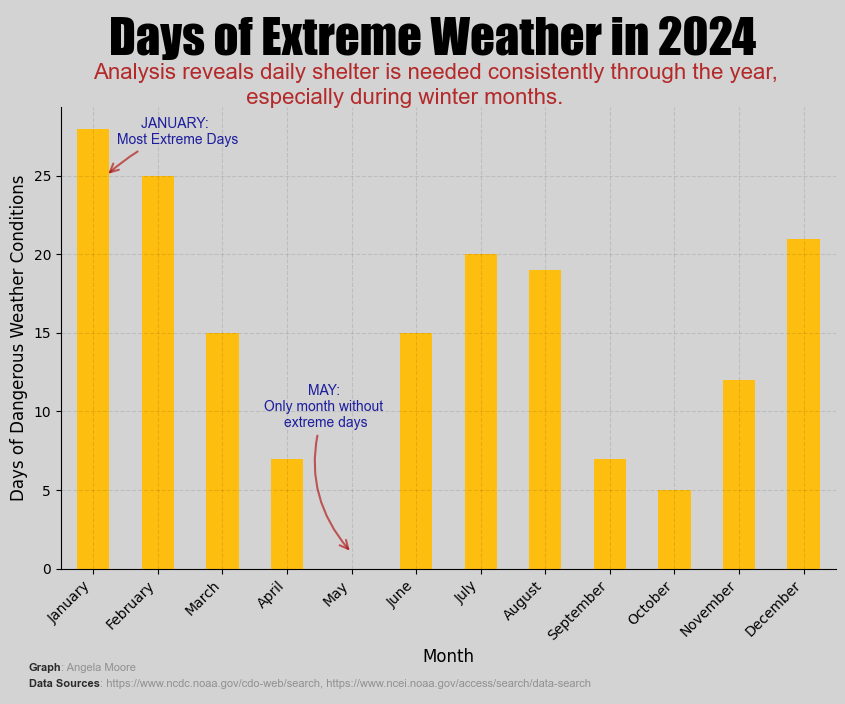

In [241]:
# Set figure size and dpi
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot type
monthly_extreme = (
    full_df.groupby("Month", observed=False)["Extreme_Weather"]
           .sum()
           .reindex([
                "January","February","March","April","May","June",
                "July","August","September","October","November","December"
           ]) 
)

monthly_extreme.plot(kind="bar")

# Labels
plt.xlabel("Month")
plt.ylabel("Days of Dangerous Weather Conditions")
plt.xticks(rotation=45, ha='right')

# Title (added space for larger figure)
s = "Days of Extreme Weather in 2024"
ax_text(x=.25, y=35.2, s=s, fontfamily='impact', size=35, ha="left")

# Additional subtitle
s = "Analysis reveals daily shelter is needed consistently through the year, \n                         especially during winter months."
ax_text(x=0, y=32.2, s=s, fontfamily='arial', size=16, ha="left", color='#AD0000', alpha=0.8)

#Annotation arrow for month with most extreme days
ax.annotate(
    "JANUARY: \nMost Extreme Days",
    xy=(0.2, 25),
    xytext=(1.3, 27),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.1",
        alpha=0.6,
    )
)

# Annotation arrow for May only month without extreme days
ax.annotate(
    "MAY: \nOnly month without \nextreme days",
    xy=(4, 1),
    xytext=(3.6, 9),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Caption
s = "<Graph>: Angela Moore \n<Data Sources>: https://www.ncdc.noaa.gov/cdo-web/search, https://www.ncei.noaa.gov/access/search/data-search"
ax_text(
    x=-1,
    y=-6,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

# Format axes
apply_formatter()

plt.show()

Plotting "Weather Categories by Month in 2024"

<Figure size 1300x600 with 0 Axes>

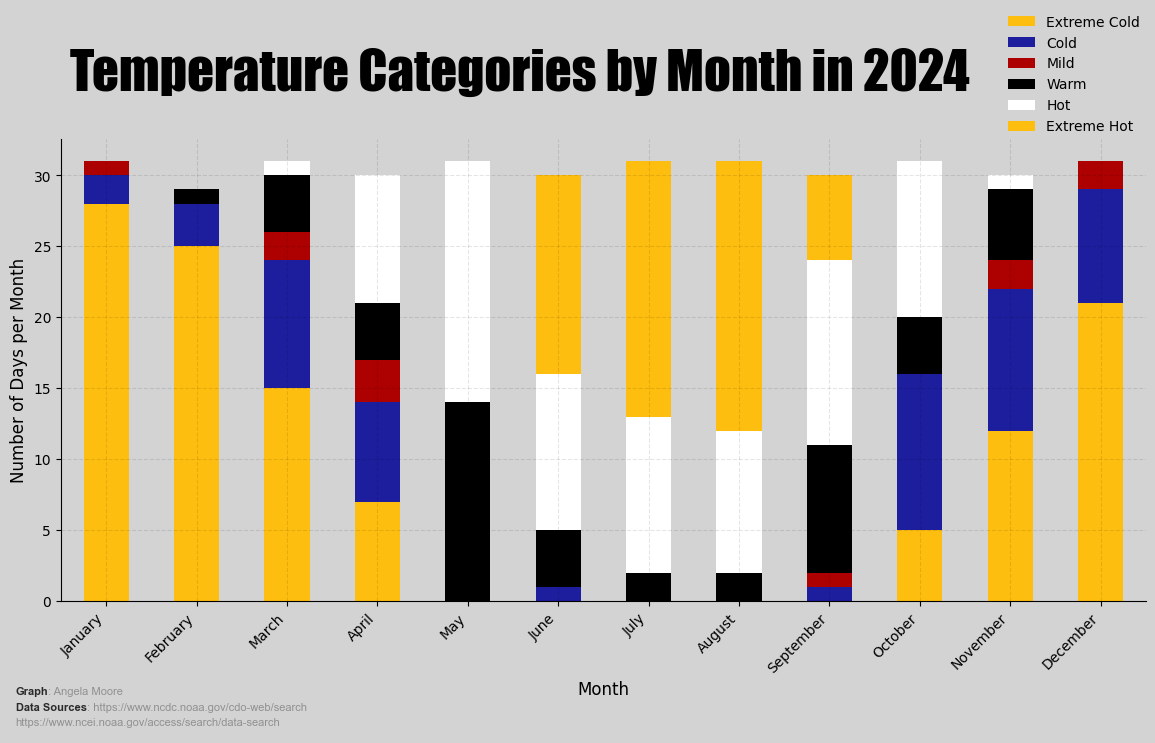

In [242]:

temp_cat_by_month = full_df.groupby(["Month", "Temperature_Category"], observed=False).size().unstack(fill_value=0)

#custom_colors = ["#111111", x6 colors]

plt.figure(figsize=(13, 6))
temp_cat_by_month.plot(kind="bar", stacked=True, figsize=(14,6))

plt.xlabel("Month")
plt.ylabel("Number of Days per Month")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0)

# Title (added space for larger figure)
s = "Temperature Categories by Month in 2024"
ax_text(x=-.4, y=39, s=s, fontfamily='impact', size=38, ha="left")

# Caption
s = "<Graph>: Angela Moore \n<Data Sources>: https://www.ncdc.noaa.gov/cdo-web/search \nhttps://www.ncei.noaa.gov/access/search/data-search"
ax_text(
    x=-1,
    y=-6,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

# Format axes
apply_formatter()

plt.show()




Plotting "Daily Feels-Like temperature everyday in 2024", with thresholds for extreme heat and extreme cold:

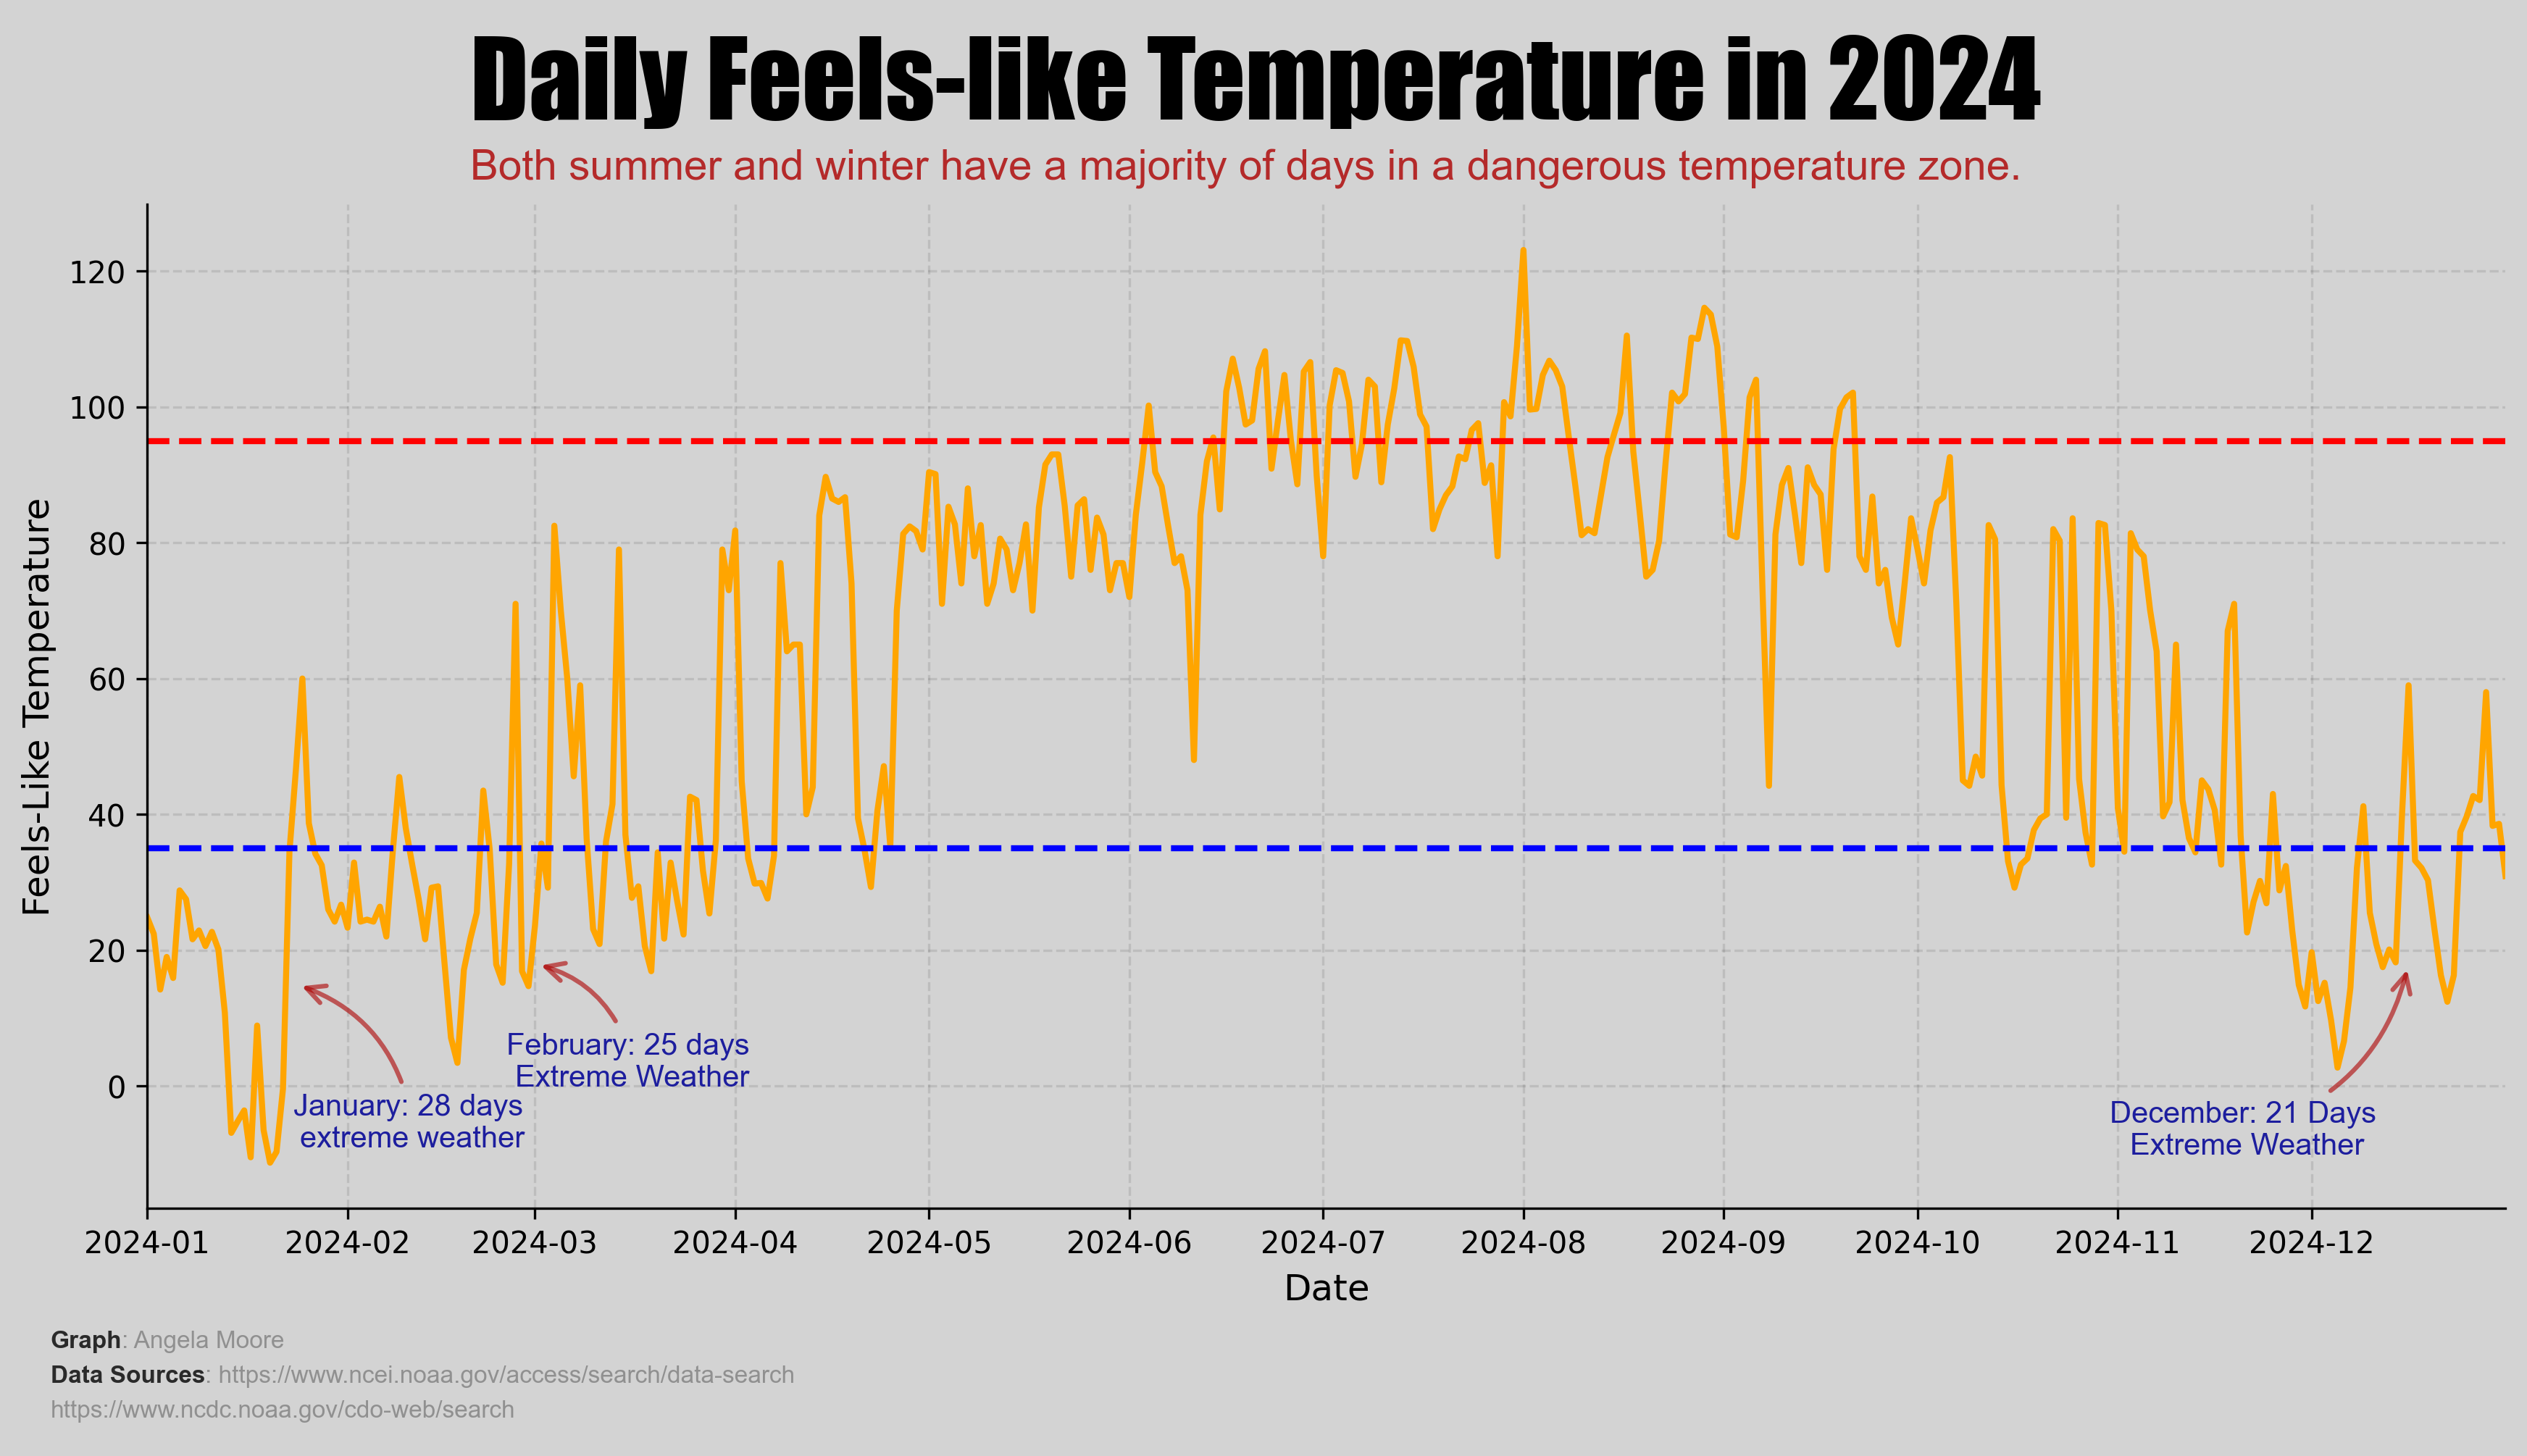

In [353]:
full_df = full_df.sort_values("Date")

#plt.figure(figsize=(13, 6))
plt.figure(figsize=(14, 6), dpi=300)
ax = plt.gca()
plt.plot(full_df["Date"], full_df["Feels_Like"], color="orange")
plt.margins(x=0)
#plt.tight_layout()

plt.axhline(95, linestyle="--", color="red", label="Extreme Heat (95)")
plt.axhline(35, linestyle="--", color="blue", label="Extreme Cold (35)")

plt.xlabel("Date")
plt.ylabel("Feels-Like Temperature")
#plt.title("Daily Feels-Like Temperature in 2024")
#plt.show()

#ax.set_ylim(-35, 130)

x_min = full_df["Date"].min()
delta = pd.Timedelta(days =50)
x_footer = x_min + delta
# Title
s = "Daily Feels-like Temperature in 2024"
ax_text(x=x_footer, y=155, s=s, fontfamily='impact', size=35, ha="left")

# Additional subtitle
s = "Both summer and winter have a majority of days in a dangerous temperature zone."
ax_text(x=x_footer, y=138, s=s, fontfamily='arial', size=14, ha="left", color="#AD0000", alpha=0.8)


# # Annotation arrow
x_min = full_df["Date"].min()
delta = pd.Timedelta(days = 23)
gamma = pd.Timedelta(days = 41)
x_footer = x_min + delta
x2_footer = x_min + gamma
ax.annotate(
    "January: 28 days \nextreme weather",
    xy=(x_footer, 15),
    xytext=(x2_footer, -9),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Annotation arrow
x_min = full_df["Date"].min()
delta = pd.Timedelta(days = 60)
gamma = pd.Timedelta(days = 75)
x3_footer = x_min + delta
x4_footer = x_min + gamma
ax.annotate(
    "February: 25 days \nExtreme Weather",
    xy=(x3_footer, 18),
    xytext=(x4_footer, 0),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# # Annotation arrow
x_min = full_df["Date"].min()
delta = pd.Timedelta(days = 350)
gamma = pd.Timedelta(days = 325)
x5_footer = x_min + delta
x6_footer = x_min + gamma
ax.annotate(
    "December: 21 Days \nExtreme Weather",
    xy=(x5_footer, 18),
    xytext=(x6_footer, -10),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

x_min = full_df["Date"].min()
delta = pd.Timedelta(days =15)
x_footer = x_min - delta
s = "<Graph>: Angela Moore    \n<Data Sources>: https://www.ncei.noaa.gov/access/search/data-search \nhttps://www.ncdc.noaa.gov/cdo-web/search"
ax_text(
    x= x_footer,
    y=-36,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

# Format axes
apply_formatter()


#print(ax.get_ylim())
plt.show()

In [326]:
days_extreme = full_df.groupby("Month", observed=False)["Extreme_Weather"].sum()
days_extreme

Month
January      28
February     25
March        15
April         7
May           0
June         15
July         20
August       19
September     7
October       5
November     12
December     21
Name: Extreme_Weather, dtype: int64

Plotting "Daily Ozone Levels in 2024":

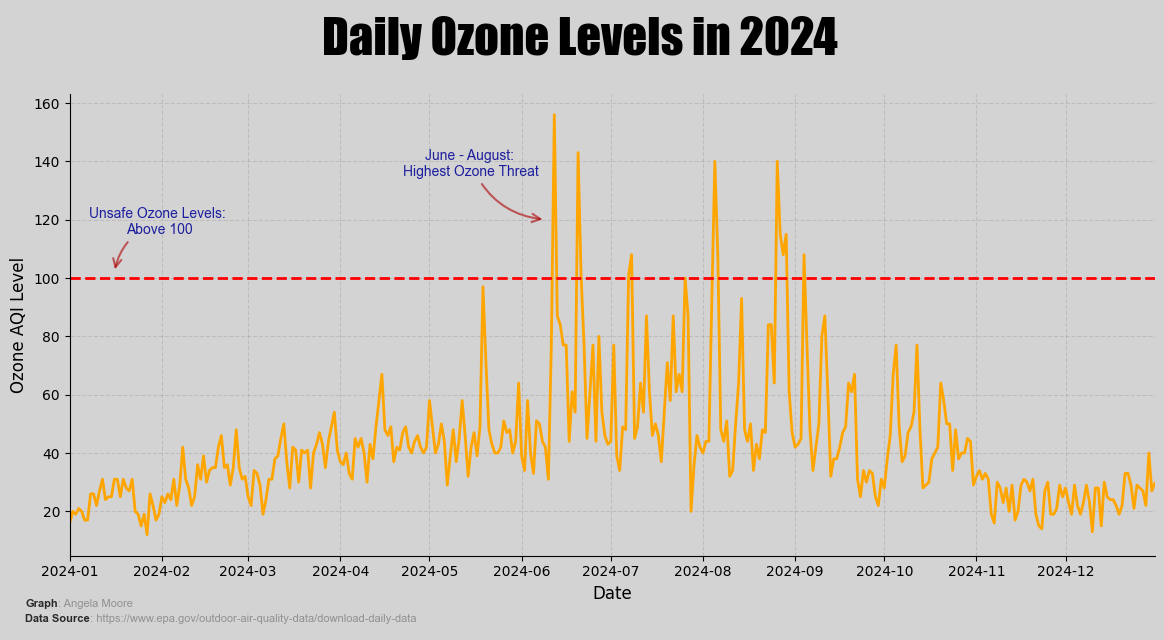

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = plt.gca()

plt.plot(full_df["Date"], full_df["AQI_Value"], color="orange")
plt.margins(x=0)
plt.axhline(100, linestyle="--", color="red")

plt.xlabel("Date")
plt.ylabel("Ozone AQI Level")

x_min = full_df["Date"].min()
delta = pd.Timedelta(days =85)
x_footer = x_min + delta
# Title
s = "Daily Ozone Levels in 2024"
ax_text(x=x_footer, y=190, s=s, fontfamily='impact', size=35, ha="left")

# # Additional subtitle
# s = "Both summer and winter have a majority of days in a dangerous temperature zone."
# ax_text(x=x_footer, y=138, s=s, fontfamily='arial', size=14, ha="left", color="#AD0000", alpha=0.8)

# # Annotation arrow
x_min = full_df["Date"].min()
delta = pd.Timedelta(days = 160)
gamma = pd.Timedelta(days = 135)
x_footer = x_min + delta
x2_footer = x_min + gamma
ax.annotate(
    "June - August: \nHighest Ozone Threat",
    xy=(x_footer, 120),
    xytext=(x2_footer, 135),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Annotation arrow
x_min = full_df["Date"].min()
delta = pd.Timedelta(days = 15)
gamma = pd.Timedelta(days = 30)
x3_footer = x_min + delta
x4_footer = x_min + gamma
ax.annotate(
    "Unsafe Ozone Levels: \nAbove 100",
    xy=(x3_footer, 102),
    xytext=(x4_footer, 115),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

x_min = full_df["Date"].min()
delta = pd.Timedelta(days = 15)
x_footer = x_min - delta
s = "<Graph>: Angela Moore    \n<Data Source>: https://www.epa.gov/outdoor-air-quality-data/download-daily-data"
ax_text(
    x= x_footer,
    y=-10,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

# Format axes
apply_formatter()
plt.show()

Plotting "Extreme Categories and Totals":

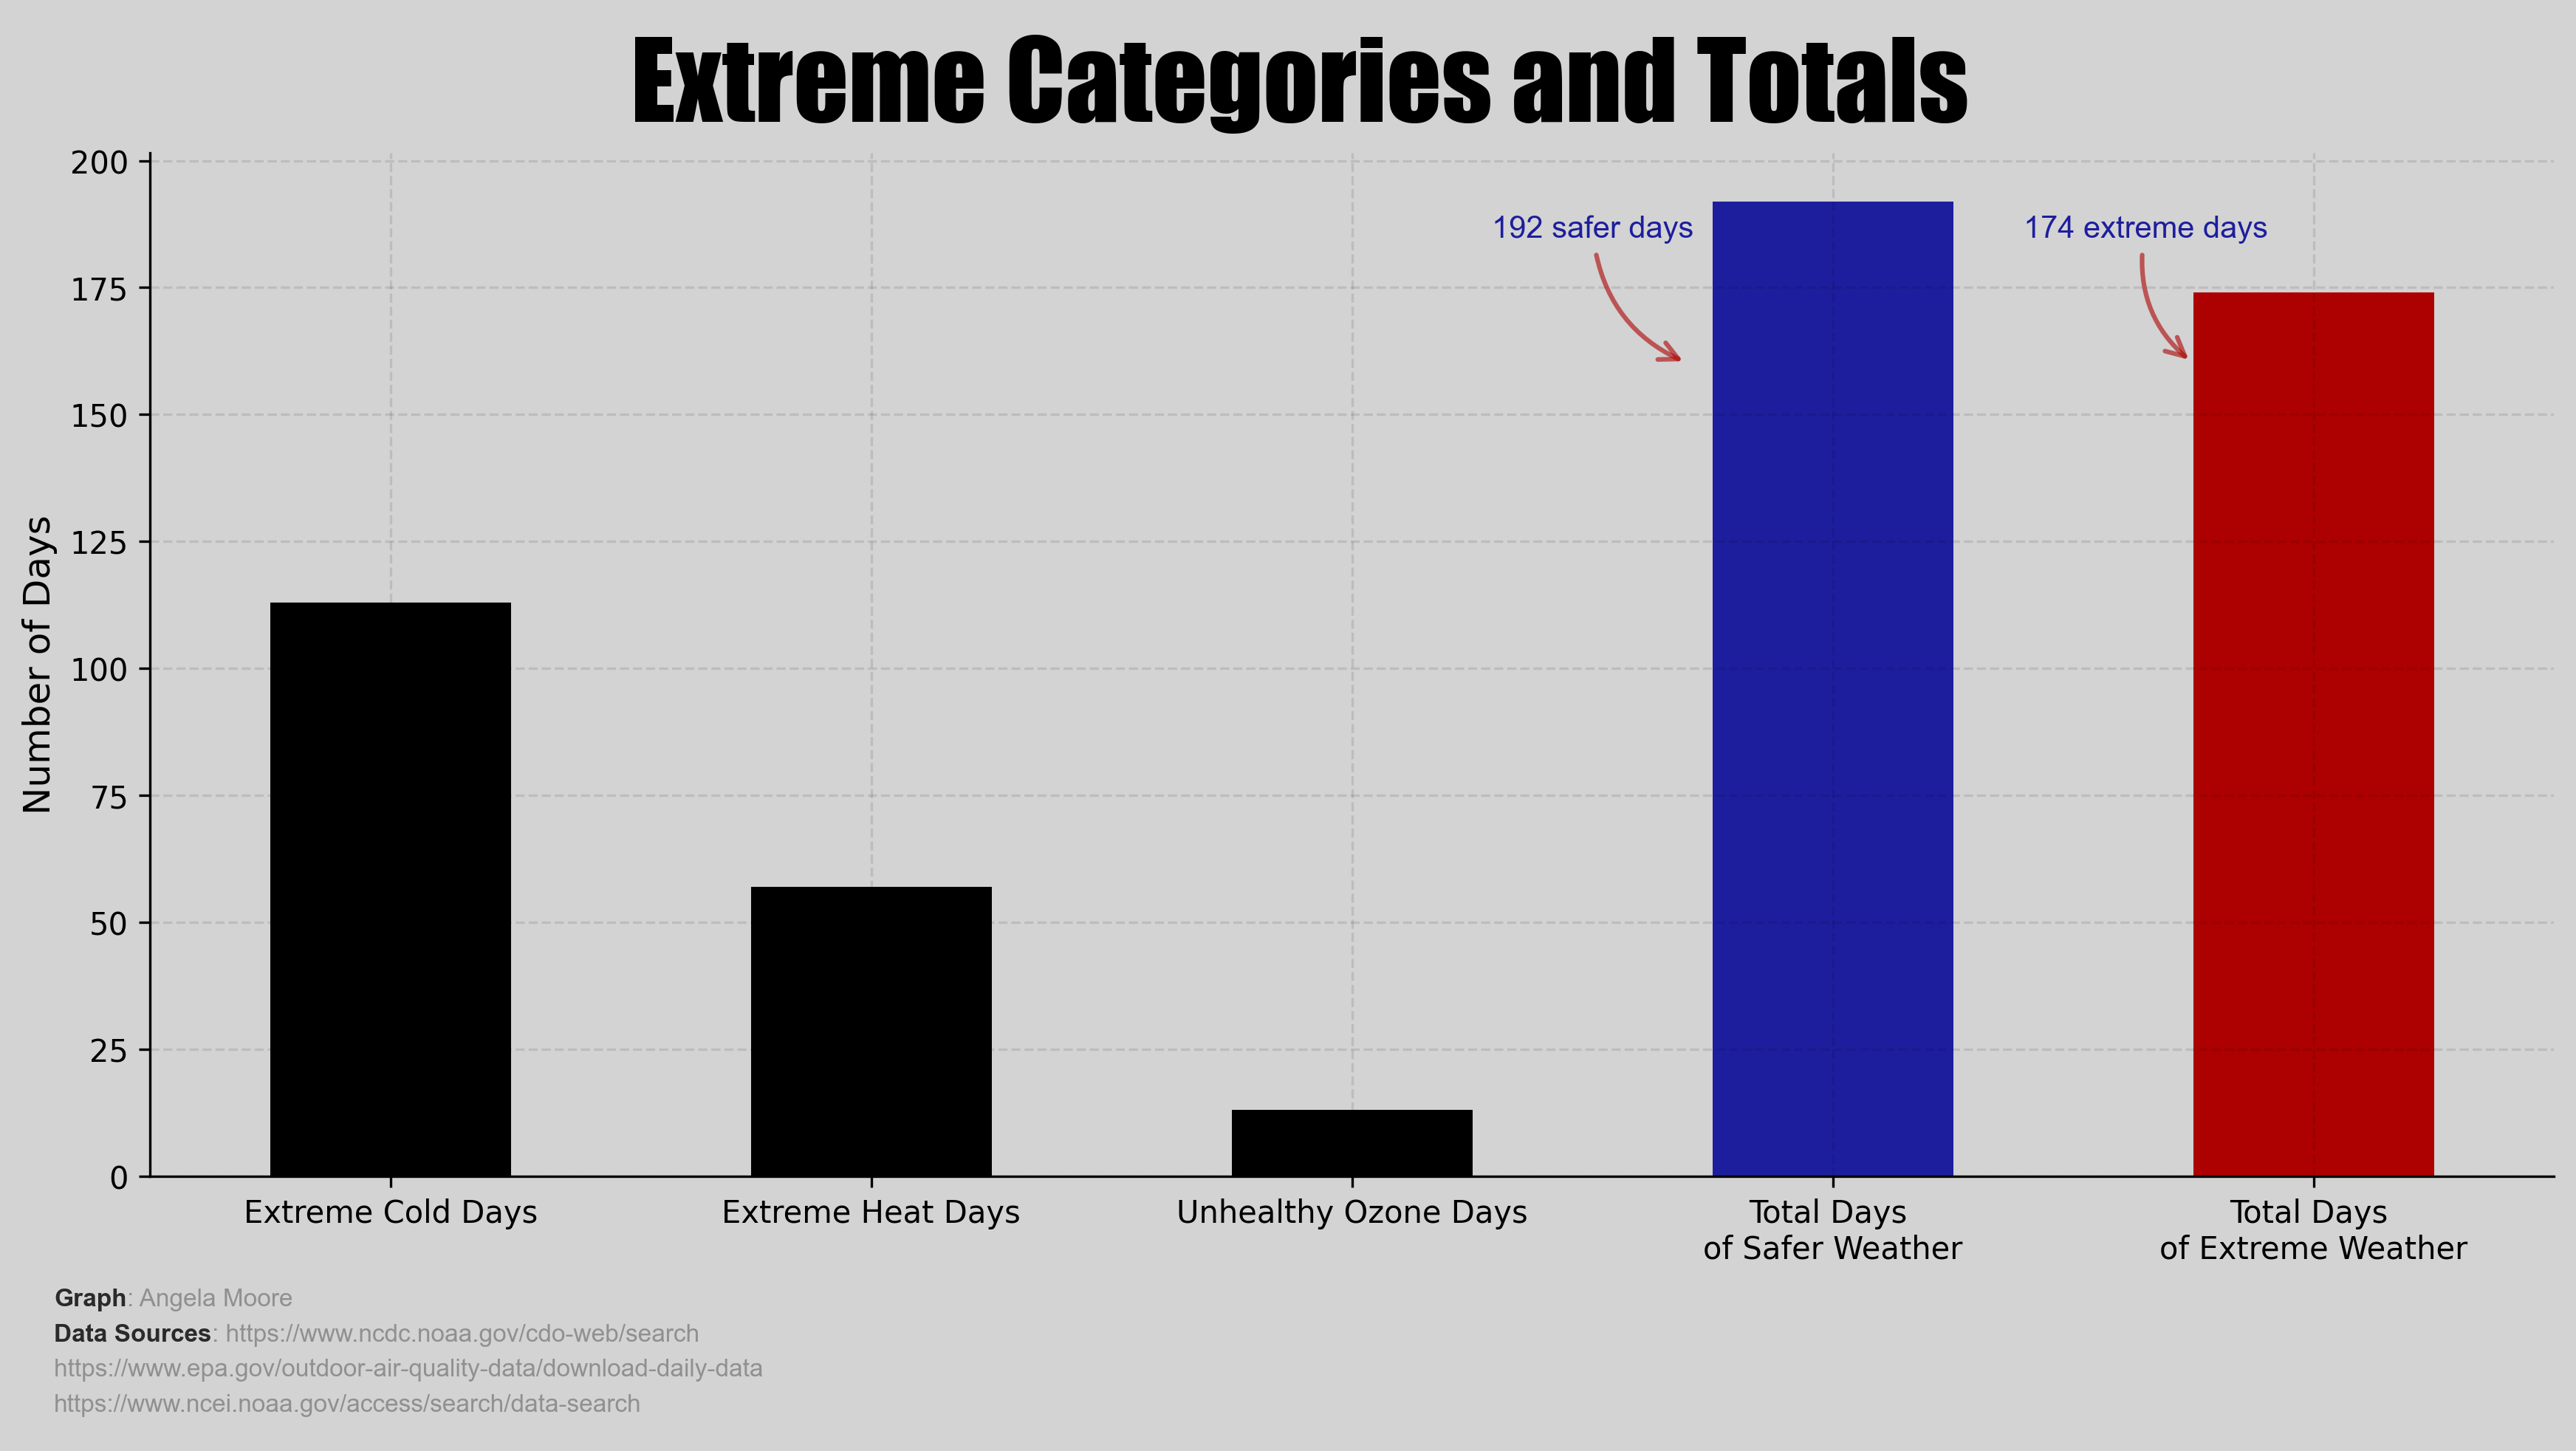

In [289]:
#variables for counts of days in each category
extreme_cold_days = (full_df["Feels_Like"] <= 35).sum()
extreme_heat_days = (full_df["Feels_Like"] >= 95).sum()
unhealthy_ozone_days = (full_df["AQI_Value"] >= 100).sum()
total_safe_days = (full_df["Extreme_Weather"] == False).sum()
total_extreme_days = (full_df["Extreme_Weather"] == True).sum()

#create summary dictionary
summary = {
    "Extreme Cold Days": extreme_cold_days,
    "Extreme Heat Days": extreme_heat_days,
    "Unhealthy Ozone Days": unhealthy_ozone_days,
    "Total Days \nof Safer Weather": total_safe_days,
    "Total Days \nof Extreme Weather": total_extreme_days
    
}

#convert to dataframe for plotting:
summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["Count"])

#plot
#plt.figure(figsize=(12,6))
plt.figure(figsize=(14, 6), dpi=300)
ax = plt.gca()

summary_df["Count"].plot(
    kind="bar",
    color = ['#000000', '#000000', '#000000','#1D1E9E', '#AD0000']
)
plt.ylabel("Number of Days")
plt.xticks(rotation=0)

# Title (added space for larger figure)
s = "Extreme Categories and Totals"
ax_text(x=.5, y=225, s=s, fontfamily='impact', size=35, ha="left")

# # Annotation arrow
ax.annotate(
    "192 safer days",
    xy=(2.7, 160),
    xytext=(2.5, 185),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

ax.annotate(
    "174 extreme days",
    xy=(3.75, 160),
    xytext=(3.65, 185),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)


#Caption
s = "<Graph>: Angela Moore    \n<Data Sources>: https://www.ncdc.noaa.gov/cdo-web/search  \nhttps://www.epa.gov/outdoor-air-quality-data/download-daily-data  \nhttps://www.ncei.noaa.gov/access/search/data-search"

ax_text(
    x= -.7,
    y= -22,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

apply_formatter()
plt.show()

#### (data sources for reference, while making plots)

https://www.ncdc.noaa.gov/cdo-web/search 

https://www.epa.gov/outdoor-air-quality-data/download-daily-data 

https://www.ncei.noaa.gov/access/search/data-search"

https://www.ncdc.noaa.gov/cdo-web/search

# Keep this file in your project

keep at the bottom of your project

We will go over it later, its a script that will generate a markdown table of contents based on your headings created here in markdown.

In [247]:
import json
import os


def generate_toc_from_notebook(notebook_path):
    """
    Parses a local .ipynb file and generates Markdown for a Table of Contents.
    """
    if not os.path.isfile(notebook_path):
        print(f"❌ Error: File not found at '{notebook_path}'")
        return

    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    toc_markdown = "### **Table of Contents**\n"
    for cell in notebook.get('cells', []):
        if cell.get('cell_type') == 'markdown':
            for line in cell.get('source', []):
                if line.strip().startswith('#'):
                    level = line.count('#')
                    title = line.strip('#').strip()
                    link = title.lower().replace(' ', '-').strip('-.()')
                    indent = '  ' * (level - 1)
                    toc_markdown += f"{indent}* [{title}](#{link})\n"

    print("\n--- ✅ Copy the Markdown below and paste"
          "it into a new markdown cell ---\n")
    print(toc_markdown)


if __name__ == "__main__":
    # Example usage
    notebook_path = 'angela.ipynb'  # Replace with your notebook path
    generate_toc_from_notebook(notebook_path)


--- ✅ Copy the Markdown below and pasteit into a new markdown cell ---

### **Table of Contents**
    * [**Table of Contents**](#**table-of-contents**)
  * [(Will remove following Issues section when project is complete- using to stay organized)](#will-remove-following-issues-section-when-project-is-complete--using-to-stay-organized)
  * [Find Data and Note Source](#find-data-and-note-source)
  * [Reading in Data](#reading-in-data)
  * [Coverting Data to a Usable Format, and Building Ways to Handle Errors:](#coverting-data-to-a-usable-format,-and-building-ways-to-handle-errors:)
    * [Temperature data:](#temperature-data:)
    * [Ozone data:](#ozone-data:)
    * [Temp/Wind/Humidity Data:](#temp/wind/humidity-data:)
  * [Issue: Get General Info from Data:](#issue:-get-general-info-from-data:)
  * [Feature Engineering:](#feature-engineering:)
  * [Copying code from plotting notebook, for style and annotations to be consistent with others' visualizations:](#copying-code-from-plotting-no